Do a sliding window embedding of cos(t) + a*cos(2t), then cos(t) + a*cos(3t), mess with amplitudes, etc.

Try sonifying with different numbers of dimensions (use PCA to go down to the number of dimensions you want to sonify)

Do a sliding window embedding of a non-periodic signal 1. quasiperiodic signal in
	
doSinesExample(), 2. Amplitude moduled signal, 3. 
		
Try out sunspot data (and read about sunspot data and explain it to me). 
Find good sunspot data at least down to the month, down to the day would be even better

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from SlidingWindow import*
from sklearn.decomposition import PCA

%matplotlib notebook

<IPython.core.display.Javascript object>


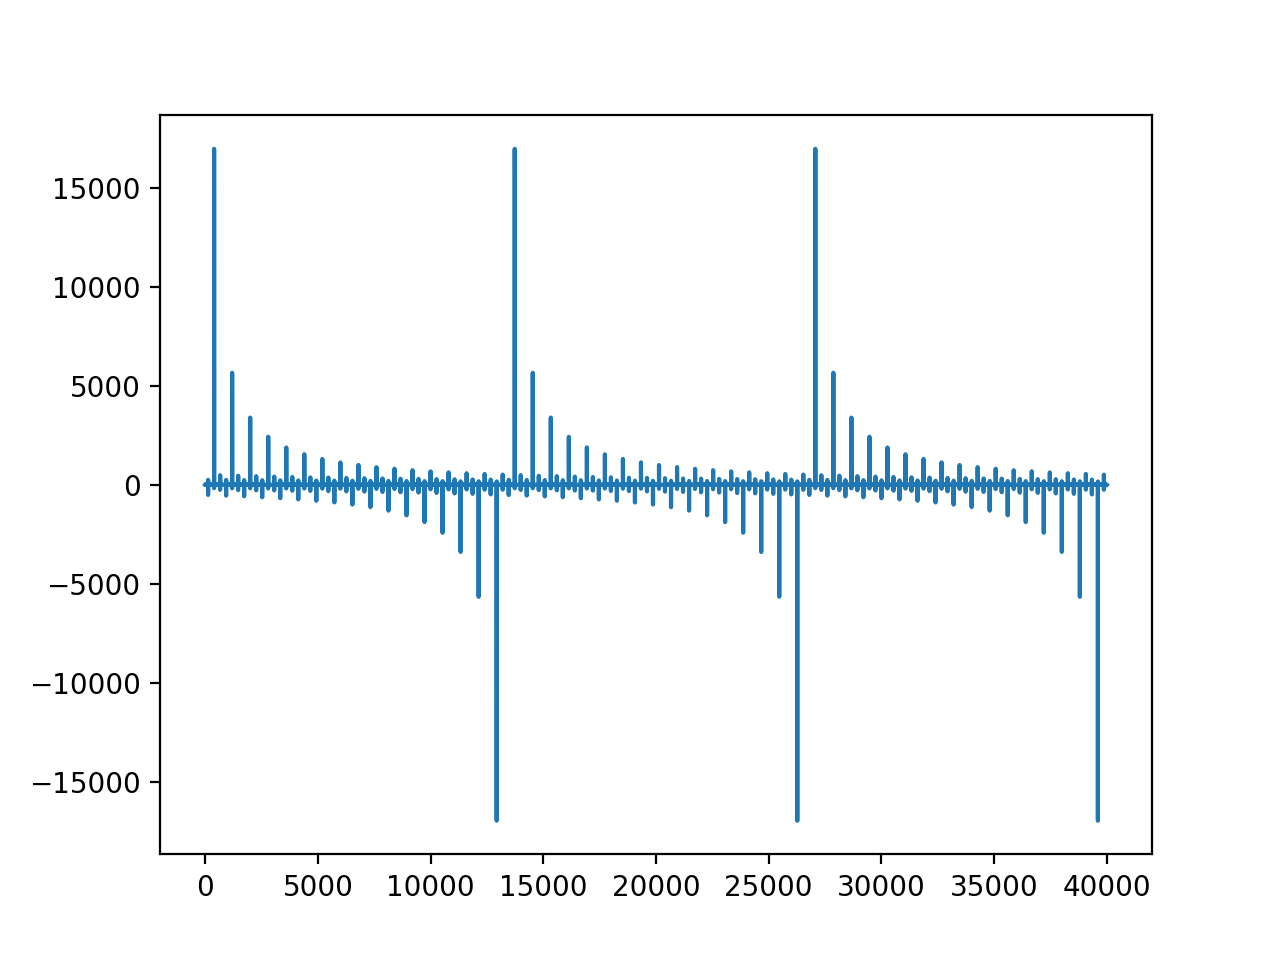

<IPython.core.display.Javascript object>


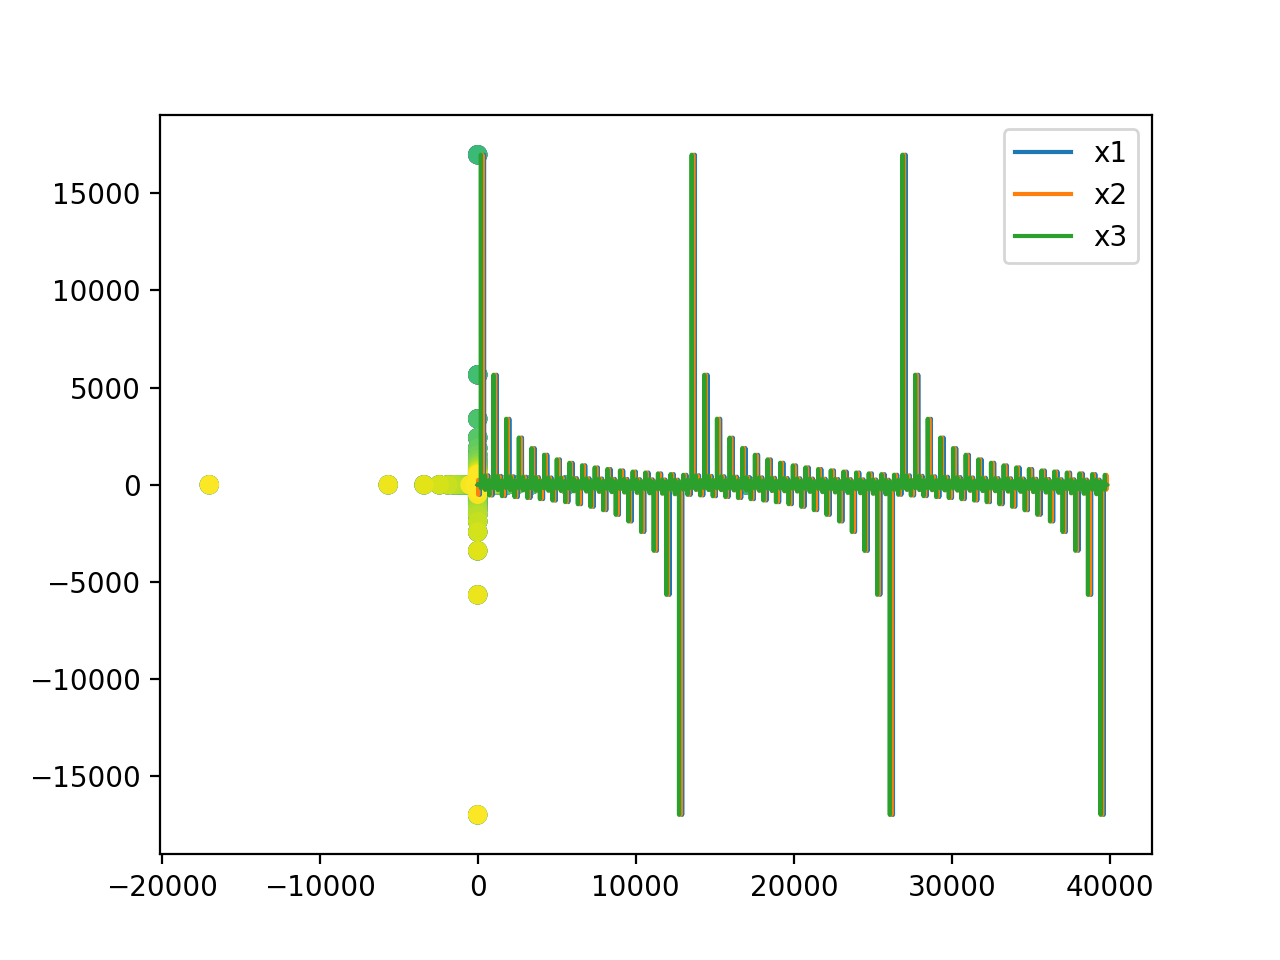

<IPython.core.display.Javascript object>


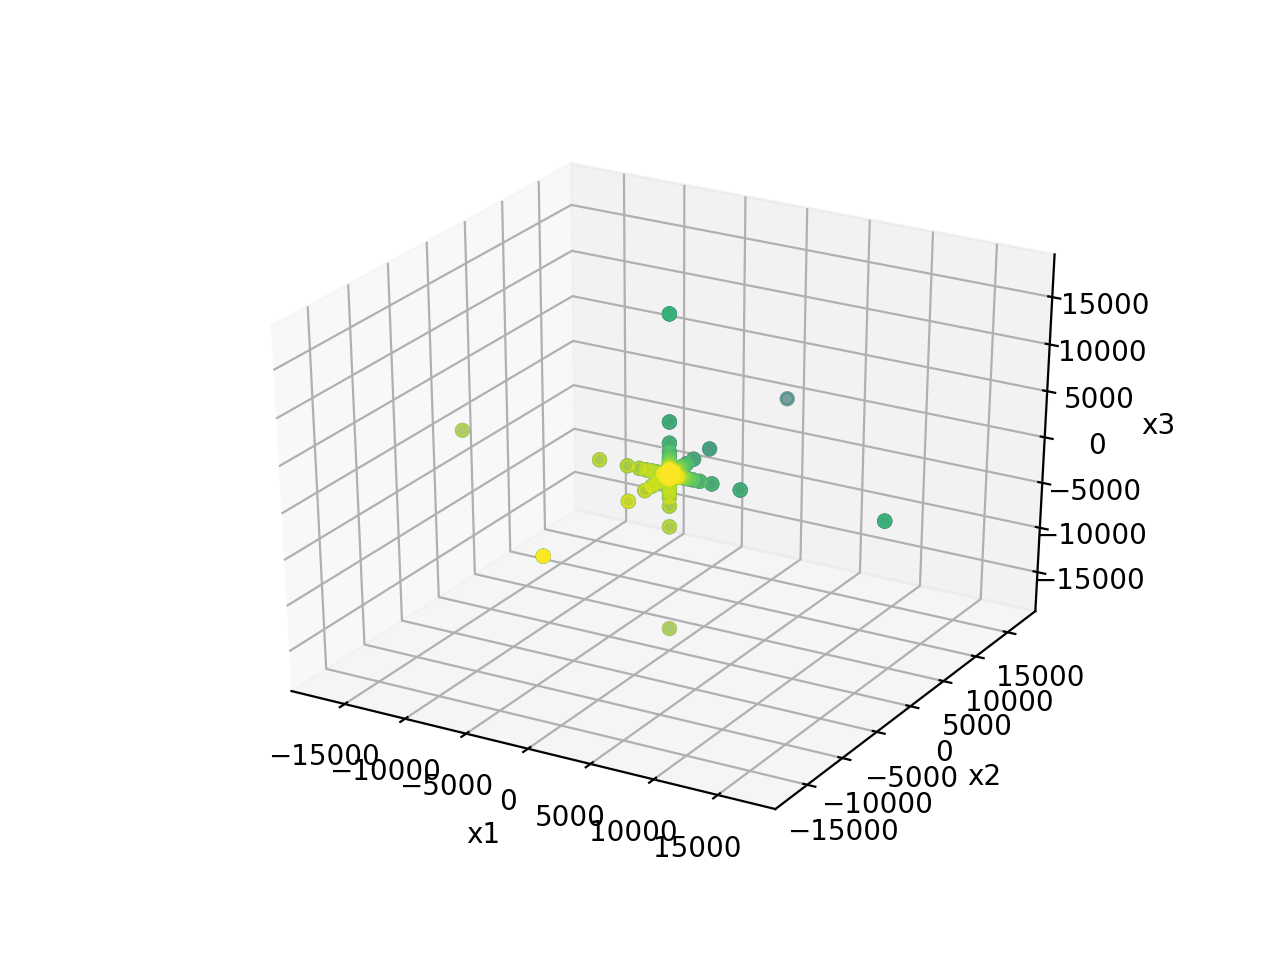

<IPython.core.display.Javascript object>


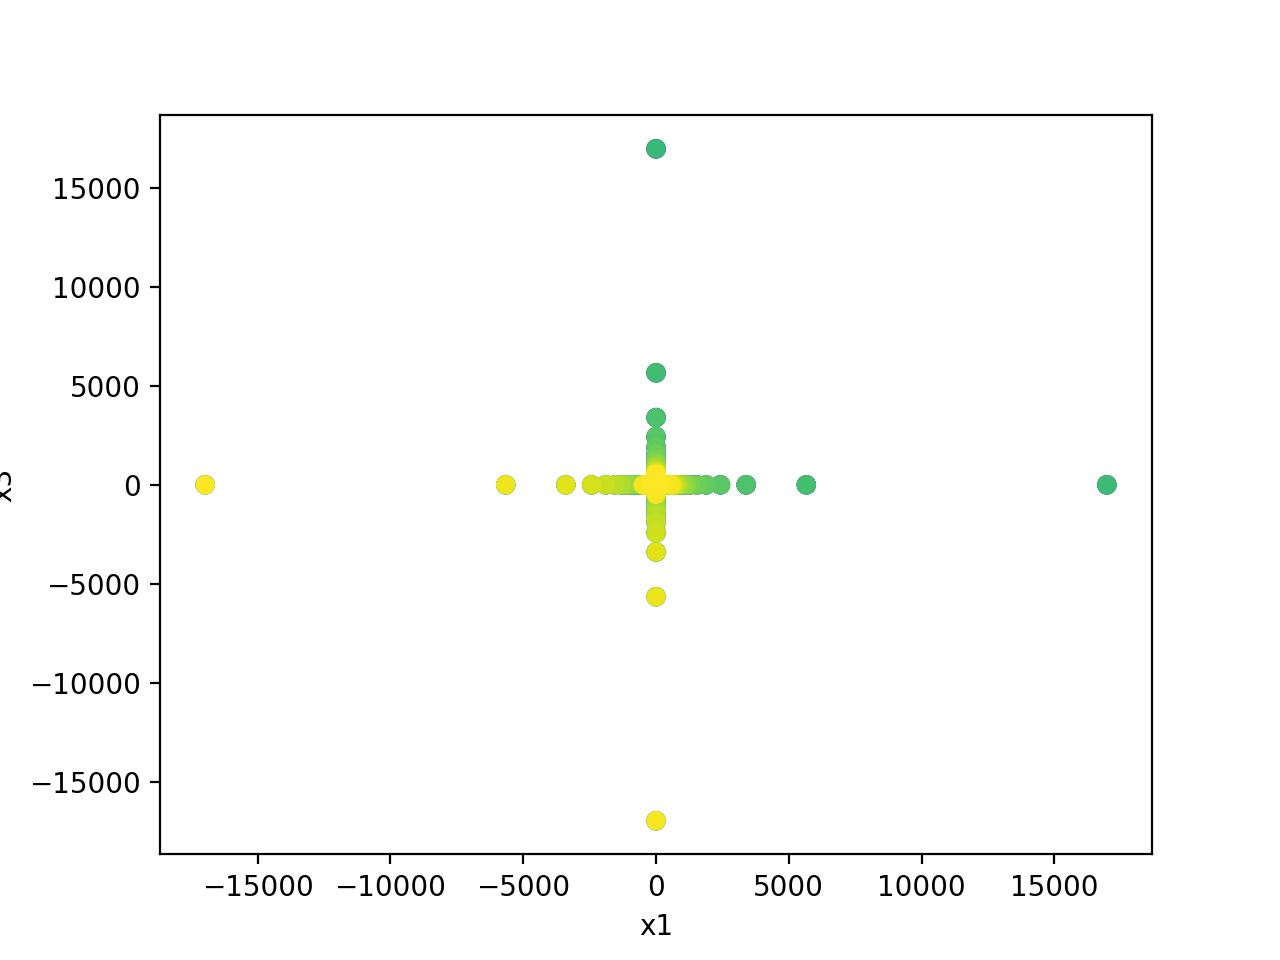

Text(0, 0.5, 'x3')

In [127]:
n_periods = 1000
samples_per_period = 40
Tau = 200
amp = 2
N = n_periods*samples_per_period
t = np.linspace(0, 2*np.pi*n_periods*1000, N)
x = np.cos(t/np.pi) + amp*np.cos(t*np.pi) - amp*np.tan(t*3)

plt.figure()
plt.plot(x)
plt.plot([0, 0], [-2, 2], c='C3')
plt.plot([Tau/2, Tau/2], [-1.5, 1.5], c='C3')
plt.plot([Tau, Tau], [-2, 2], c='C3')


x1 = x[0:-Tau]
x2 = x[int(Tau/2):-int(Tau/2)]
x3 = x[Tau::]


plt.figure()
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)
plt.legend(["x1", "x2", "x3"])

plt.scatter(x1, x2, c=t[0:len(x1)])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=t[0:len(x1)])
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")

plt.figure()
plt.scatter(x1, x3, c=t[0:len(x1)])
plt.xlabel("x1")
plt.ylabel("x3")

In [128]:
dim = 40
dT = 2

X = getSlidingWindow(x, dim, Tau, dT)
pca = PCA(n_components = 4)
Y = pca.fit_transform(X)
w = Y[:,0]
y = Y[:,1]
z = Y[:,2]
Z = Y[:,3]

fs = 44100
xSpace = np.zeros(int(fs*0.000001)) ## Put a tenth of a second space
#q = np.concatenate((x, xSpace, y, xSpace, z, xSpace, y, xSpace, x))
q = (w + y + z)
#q = (x1 + x2 + x3)

ipd.Audio(q, rate=fs/8)